In [173]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

## Extraer usuarios

In [135]:
# get users and mentions from the download files:
tweets_datas_path = ['dwnld_1.json',
                     'dwnld_2.json',
                     'dwnld_3.json']                    
tw_id=[]
tw_user_id=[]
tw_user=[]
tw_text=[]
entities_long=[]
mentioned_ids=[]

for json_file in tweets_datas_path:
    with open(json_file, "r") as tweets_file:
        for line in tweets_file:
            try:
                tweet = json.loads(line)
                tw_entities=[]
                tw_id.append(tweet["id_str"])
                tw_user_id.append(tweet["user"]["id_str"])
                tw_user.append(tweet["user"]["screen_name"])
                tw_entities.extend(tweet["entities"]["user_mentions"])
                entities_long.extend(tweet["entities"]["user_mentions"])
                tw_text_loop=[tweet["text"]]
                if tweet["truncated"]:#=="True": # Truncated indica si el tweet es corto o largo; si truncado, busca extendido
                    tw_text_loop=[tweet["extended_tweet"]["full_text"]]
                    tw_entities.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
                    entities_long.extend(tweet["extended_tweet"]["entities"]["user_mentions"])
                else:
                    if tweet["text"][0:2]=="RT":
                        if tweet["retweeted_status"]["truncated"]:
                            tw_text_loop=[tweet["retweeted_status"]["extended_tweet"]["full_text"]]
                            tw_entities.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
                            entities_long.extend(tweet["retweeted_status"]["extended_tweet"]["entities"]["user_mentions"])
                        else: 
                            tw_text_loop=[tweet["retweeted_status"]["text"]]
                            tw_entities.extend(tweet["retweeted_status"]["entities"]["user_mentions"])
                        if tweet["retweeted_status"]["is_quote_status"]:
                            tw_entities.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
                            entities_long.extend(tweet["retweeted_status"]["quoted_status"]["entities"]["user_mentions"])
                    else:
                        tw_text_loop=[tweet["text"]]
                mentioned_ids.append(list(set([ent["id_str"] for ent in tw_entities])))
                tw_text.append([tweet["id_str"],tw_text_loop])
            except:
                continue



    


In [136]:
print(len(tw_id),
      len(tw_user_id),
      len(tw_user),
      len(tw_text),
      len(entities_long),
      len(mentioned_ids))

229711 229711 229711 229697 1171370 229697


In [184]:
tweets_ids=pd.DataFrame({"tw_id":tw_id,
              "tw_user_id":tw_user_id,
              "tw_user":tw_user
             })
ids_freqs=pd.crosstab(index=tweets_ids.tw_user, columns="count")
ids_freqs=ids_freqs.sort_values(by=['count'] , ascending=False)["count"]
print("twiteros:",ids_freqs.shape[0])

twiteros: 45149


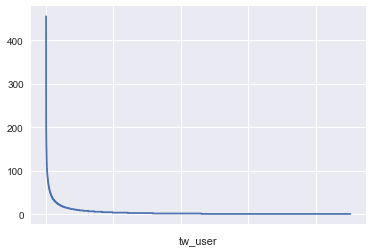

In [186]:
# ids_freqs.sort_values(by=['count'] , ascending=False)["count"]

ids_freqs.plot()# figsize=(16, 9))

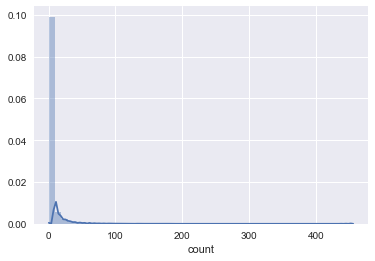

In [187]:
sns.distplot(ids_freqs)

In [179]:
round(ids_freqs.describe(),3)

col_0,count
count,45149.000
mean,5.088
std,12.992
min,1.000
25%,1.000
50%,2.000
75%,4.000
max,455.000


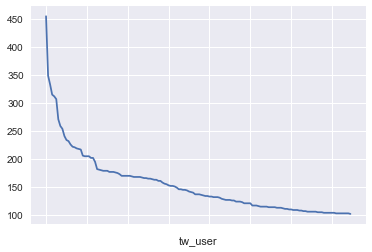

In [188]:
ids_freqs[:150].plot()# figsize=(16, 9))

In [165]:
ids_freqs.sort_values(by=['count'] , ascending=False)["count"][:60]

tw_user
PORMIPATRIAYA      455
Yaniracolombia     349
Cmarcafederal      333
marco_caldon       315
NANACHAGU          312
valderramaangel    307
abel3131           271
DieGatto1          259
GladysBecerra1     254
biolucho2005       241
CarrillonavasG     234
nenoriega5         232
megavas            226
lugicas            222
MACMontt           221
LuisCarlosFV2      219
TWITERM99417410    218
pierrealee         217
waltermunevar      206
ramiropinzon56     205
DavidMed_          205
SGTBerkoff1981     205
lguzmangomez       202
Kinopodia          202
jjolivella         195
MiguelS69397877    182
carlucas956666     181
jose_amed          180
jklosan05          179
VancliffDesign     179
krlosgiraldo1      179
JaviJimenezl       177
noelquisa          177
josecastano0904    177
Gustavo68831299    176
VictoriaRubian5    175
Amparoc66          173
PabloSolanoMat1    170
AbCarrymar         170
manueljoseluque    170
billybrown6161     170
pajaritopi01       170
jpalacioposada     169
Her

In [139]:
uniq_ids=list(set([entit["id_str"]for entit in entities_long]))
len(uniq_ids)

16209

In [140]:
ments_df=pd.DataFrame([[entit["id_str"],
                        entit["screen_name"],
                        entit["name"]
                       ]for entit in entities_long],
                     columns=["id_str","screen_name","name"])

In [206]:
ments_freq=pd.crosstab(index=ments_df.screen_name, columns="count")
ments_freq=ments_freq.sort_values(by=['count'] , ascending=False)
print("Cuentas mencionadas",ments_freq.shape[0])

Cuentas mencionadas 16220


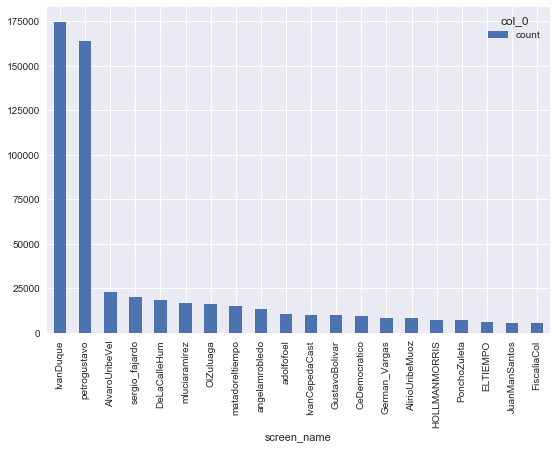

In [212]:
ments_freq[:20].plot(kind='bar', figsize=(9,6))

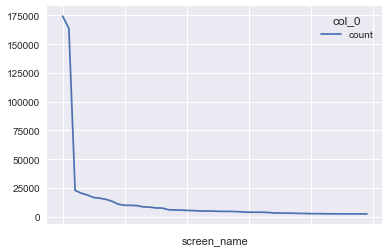

In [216]:
ments_freq[:50].plot()# figsize=(16, 9))

In [213]:
ments_freq[:20]#60

col_0,count
screen_name,
IvanDuque,174306
petrogustavo,163745
AlvaroUribeVel,22861
sergio_fajardo,20450
DeLaCalleHum,18823
mluciaramirez,16636
OIZuluaga,16051
matadoreltiempo,15030
angelamrobledo,13255


In [214]:
round(ments_freq.describe(),3)

col_0,count
count,16220.000
mean,72.218
std,1937.408
min,1.000
25%,2.000
50%,3.000
75%,11.000
max,174306.000
